In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 


In [172]:
data = pd.read_csv("steam_games.csv")

In [173]:
data.describe(include='all') 

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
count,24073,28851,32133,30085,32133,30067,31971,224.000000,32132,31464,30757,32133,3.213200e+04,28836,24952,2607.000000
unique,8237,883,32093,30053,32133,3582,15395,NaN,32131,4649,162,2,NaN,10992,18,NaN
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"['Casual', 'Simulation']",NaN,http://steamcommunity.com/app/612880/reviews/?...,['Single-player'],4.99,False,NaN,Ubisoft - San Francisco,Mixed,NaN
freq,385,1880,3,3,1,100,1292,NaN,2,2794,4278,30186,NaN,1259,4103,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.916875,NaN,NaN,NaN,NaN,4.517616e+05,NaN,NaN,72.255466
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.530618,NaN,NaN,NaN,NaN,1.827153e+05,NaN,NaN,10.833525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,NaN,NaN,1.000000e+01,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340000,NaN,NaN,NaN,NaN,3.293025e+05,NaN,NaN,66.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000,NaN,NaN,NaN,NaN,4.520700e+05,NaN,NaN,74.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.660000,NaN,NaN,NaN,NaN,5.934025e+05,NaN,NaN,80.000000


In [174]:
data = pd.read_csv("steam_games.csv")

# Convertir los datos numéricos de la columna "price" de str a float manteniendo los no numéricos intactos
data["price"] = data["price"].str.upper()
data["price"] = pd.to_numeric(data["price"], errors='coerce').fillna(data["price"])

for x in data["price"].unique():
    if type(x) != float:
        print(x)


FREE TO PLAY
FREE
FREE DEMO
PLAY FOR FREE!
INSTALL NOW
PLAY WARMACHINE: TACTICS DEMO
FREE MOD
INSTALL THEME
THIRD-PARTY
PLAY NOW
FREE HITMAN™ HOLIDAY PACK
PLAY THE DEMO
STARTING AT $499.00
STARTING AT $449.00
FREE TO TRY
FREE MOVIE
FREE TO USE


In [175]:
# Converitr los "FREE" en valor 0
def transform_price(value):
    if isinstance(value, str) and "FREE" in value.upper():
        return 0
    elif isinstance(value, str):
        return pd.NA 
    else:
        return value  
    
data["price"] = data["price"].apply(transform_price)
data["price"] = pd.to_numeric(data["price"], errors='coerce')

In [176]:
data.describe(include='all') 

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
count,24073,28851,32133,30085,32133,30067,31971,224.000000,32132,31464,30747.000000,32133,3.213200e+04,28836,24952,2607.000000
unique,8237,883,32093,30053,32133,3582,15395,NaN,32131,4649,NaN,2,NaN,10992,18,NaN
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"['Casual', 'Simulation']",NaN,http://steamcommunity.com/app/612880/reviews/?...,['Single-player'],NaN,False,NaN,Ubisoft - San Francisco,Mixed,NaN
freq,385,1880,3,3,1,100,1292,NaN,2,2794,NaN,30186,NaN,1259,4103,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.916875,NaN,NaN,8.869377,NaN,4.517616e+05,NaN,NaN,72.255466
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.530618,NaN,NaN,15.905371,NaN,1.827153e+05,NaN,NaN,10.833525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,0.000000,NaN,1.000000e+01,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340000,NaN,NaN,2.990000,NaN,3.293025e+05,NaN,NaN,66.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000,NaN,NaN,4.990000,NaN,4.520700e+05,NaN,NaN,74.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.660000,NaN,NaN,9.990000,NaN,5.934025e+05,NaN,NaN,80.000000


# DISTRIBUCION DE PRECIO

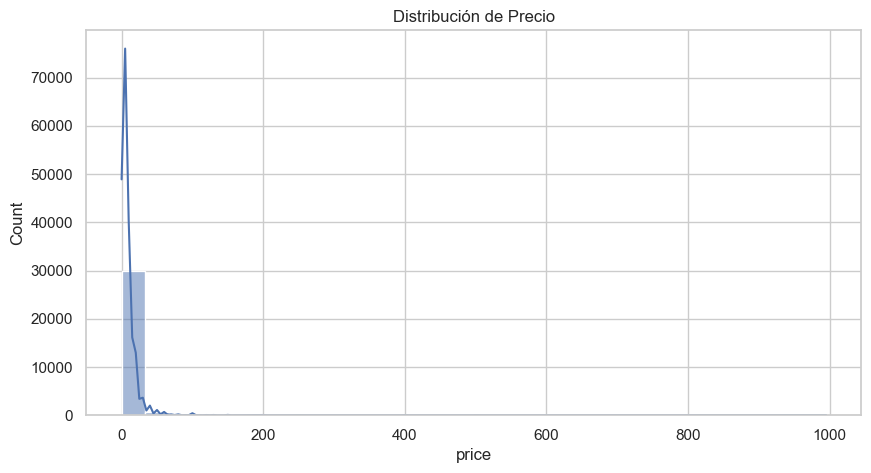

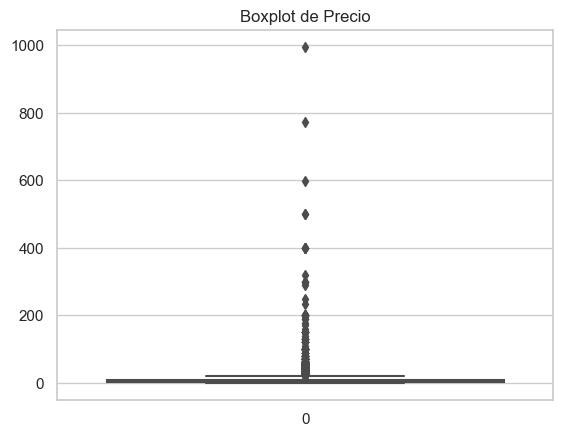

In [177]:
# Distribucion de Precio
plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribución de Precio')
plt.show()

sns.boxplot(data['price'])
plt.title('Boxplot de Precio')
plt.show()

In [178]:
# Eliminar outliers de price para que el resto de la EDA se lea bien.

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


data = data[(data['price'] >= lower_limit) & (data['price'] <= upper_limit)]

# NUEVA DISTRIBUCION DE PRECIO

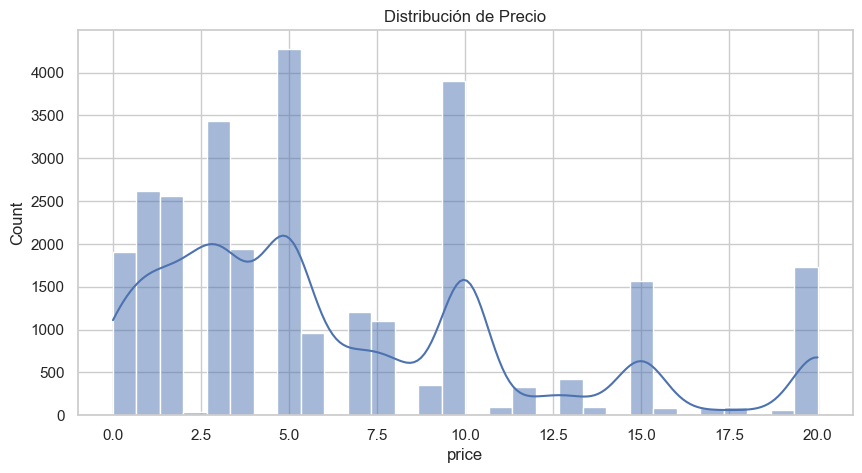

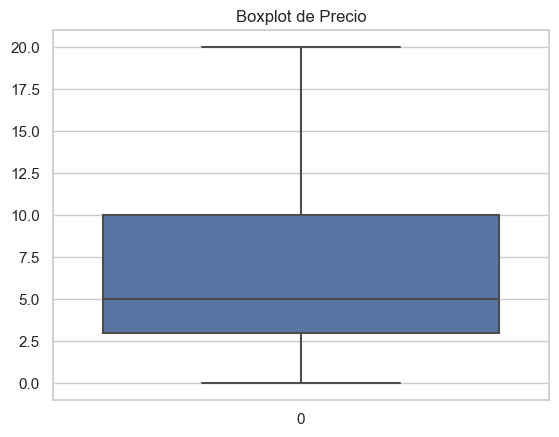

In [179]:
# Distribucion de Precio
plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribución de Precio')
plt.show()

sns.boxplot(data['price'])
plt.title('Boxplot de Precio')
plt.show()


# DISTRIBUCION METASCORE

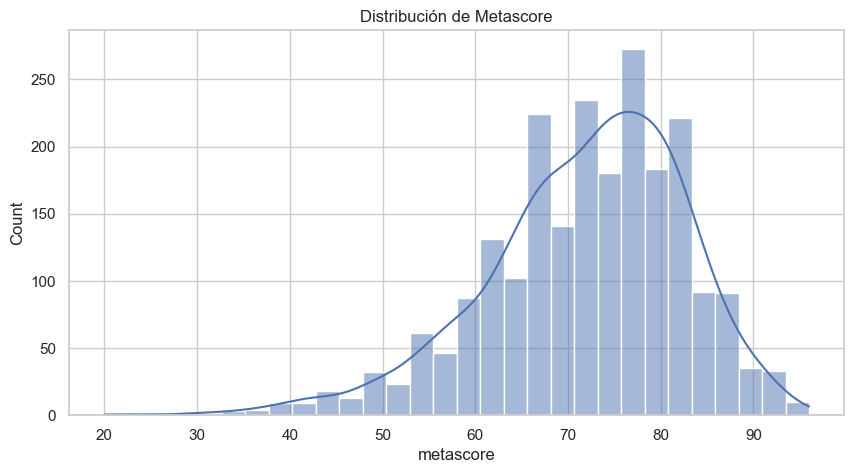

In [180]:
plt.figure(figsize=(10, 5))
sns.histplot(data['metascore'].dropna(), bins=30, kde=True) # Descarta NaNs
plt.title('Distribución de Metascore')
plt.show()

# DISTRIBUCION POR GENERO

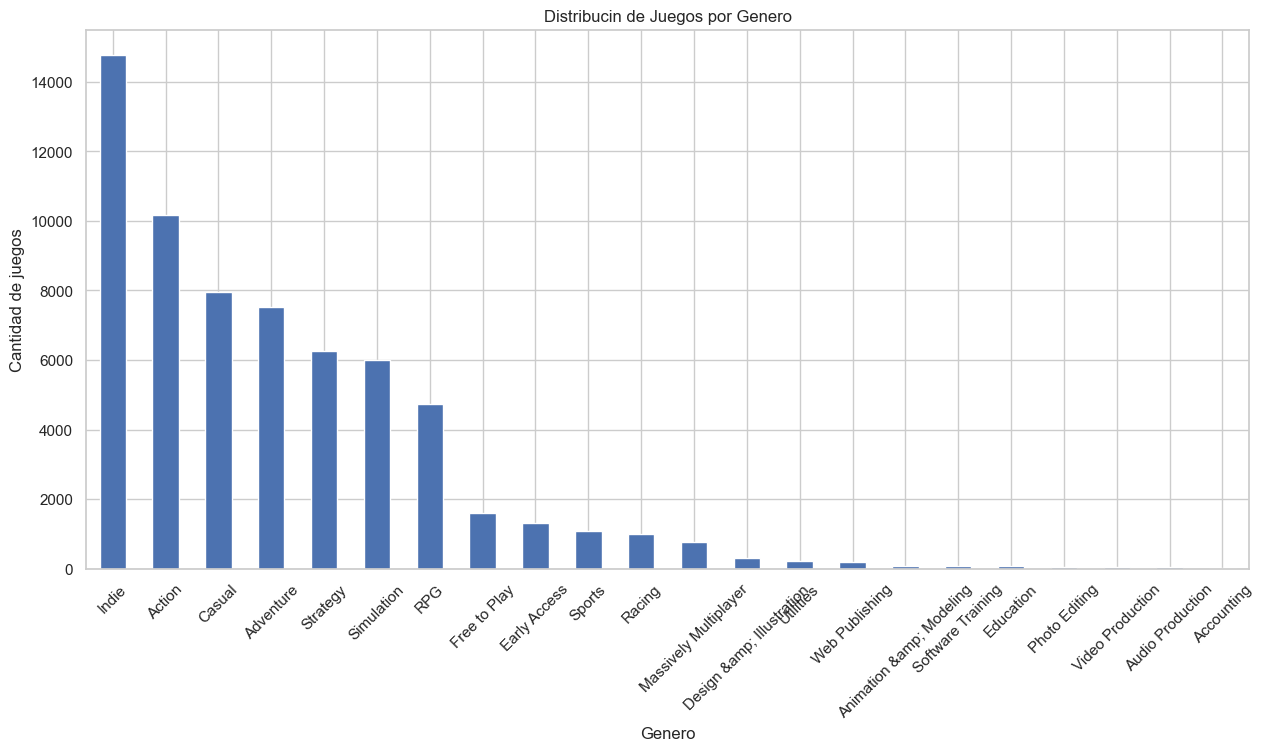

In [167]:

data['genres'] = data['genres'].dropna().apply(lambda x: eval(x))

# Ahora usamos explode() para descomponer las listas de géneros
genres = data.explode('genres')['genres'].value_counts()

plt.figure(figsize=(15, 7))
genres.plot(kind='bar')
plt.title('Distribucin de Juegos por Genero')
plt.ylabel('Cantidad de juegos')
plt.xlabel('Genero')
plt.xticks(rotation=45)
plt.show()



# DISTRIBUCION EARLY ACCESS

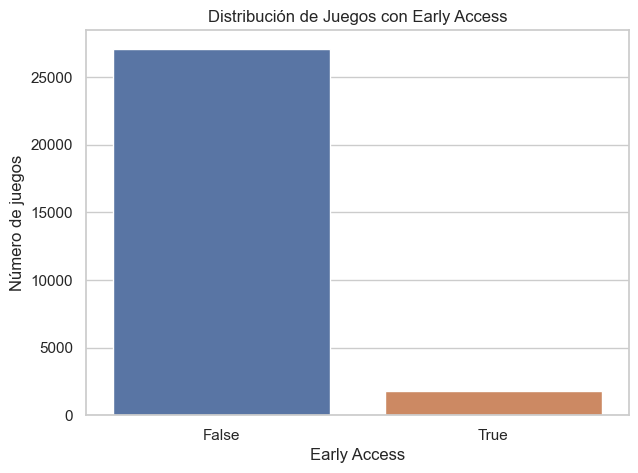

In [168]:

data['early_access_str'] = data['early_access'].astype(str)

plt.figure(figsize=(7,5))
sns.countplot(data=data, x='early_access_str')
plt.title('Distribución Early Access')
plt.xlabel('Early Access')
plt.ylabel('Numero de juegos')
plt.show()



# METASCORE Y PRECIO

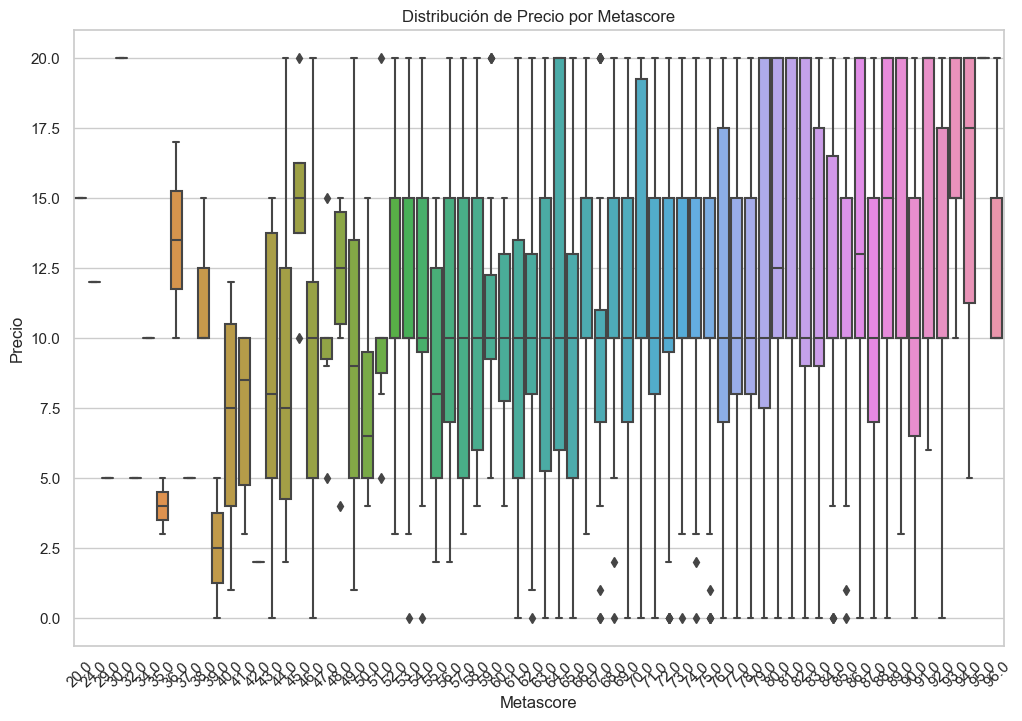

In [125]:
# Distribucion Metascore

subsample = data.dropna(subset=['metascore'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=subsample['metascore'], y=subsample['price'])
plt.title('Distribución Metascore')
plt.xlabel('Metascore')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()


# GENERO Y PRECIO

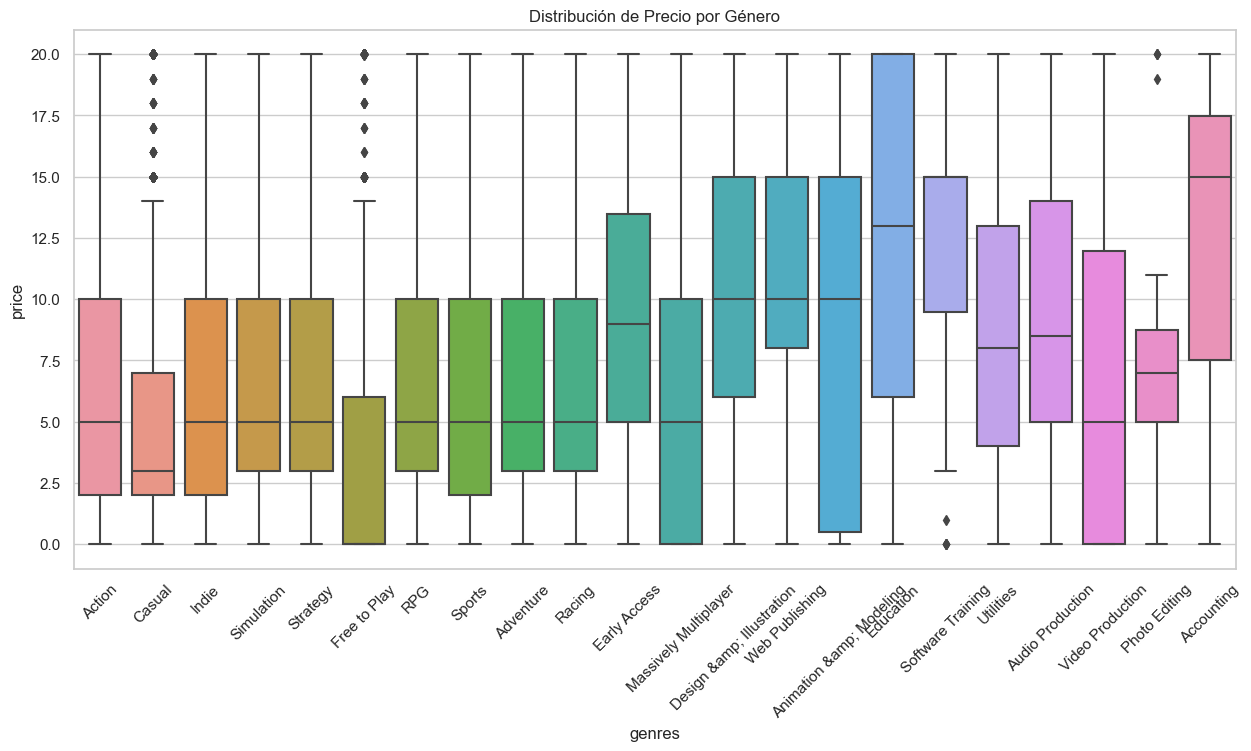

In [116]:
# Distribucion de precio por genero
from ast import literal_eval
import numpy as np

df_exploded = data.copy()

def to_list(val):
    if isinstance(val, str):
        return literal_eval(val)
    return val

df_exploded['genres'] = df_exploded['genres'].apply(to_list)


df_exploded['genres'] = df_exploded['genres'].apply(lambda x: np.nan if isinstance(x, float) or len(x) == 0 else x)


df_exploded = df_exploded.explode('genres')


plt.figure(figsize=(15, 7))
sns.boxplot(x=df_exploded['genres'], y=df_exploded['price'])
plt.title('Distribución de Precio por Género')
plt.xticks(rotation=45)
plt.show()




# EARLY ACCESS Y PRECIO

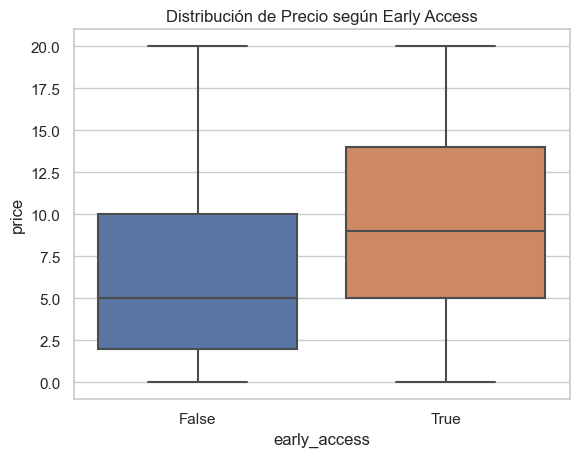

In [117]:
# Distribucion de precio por eatly access
sns.boxplot(x=data['early_access'], y=data['price'])
plt.title('Distribución de Precio según Early Access')
plt.show()


# SENTIMIENTOS Y PRECIO 

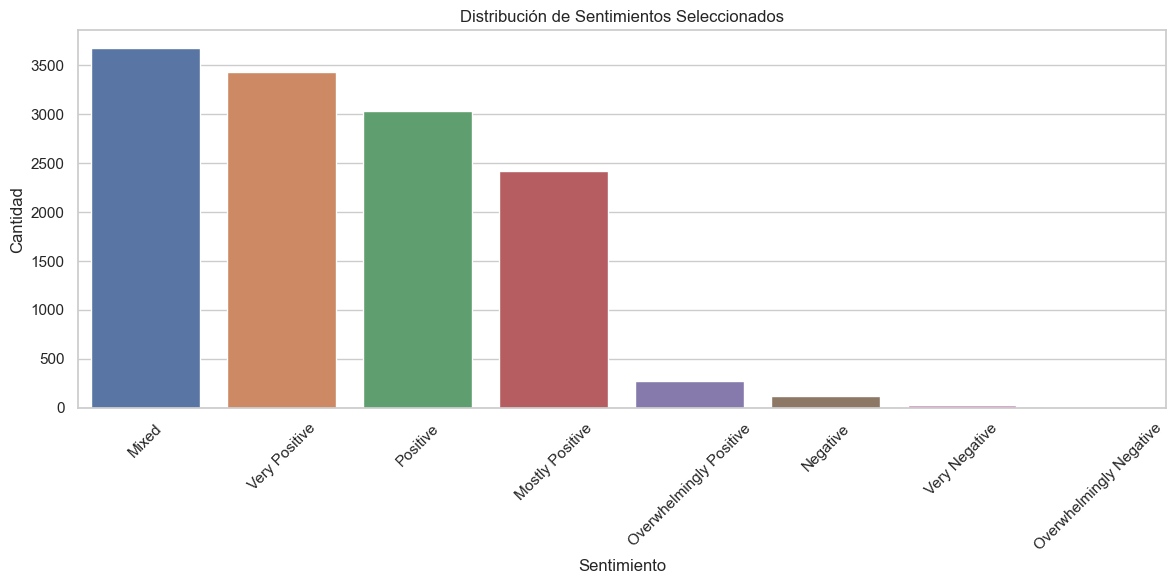

In [169]:
# Distribucion de sentimientos
# Definir los sentimientos de interés
sentiments_of_interest = ["Mixed", "Very Positive", "Positive", "Mostly Positive", "Overwhelmingly Positive", 
                          "Negative", "Very Negative", "Overwhelmingly Negative"]

# Filtrar el dataframe para incluir solo esos sentimientos
filtered_data = data[data['sentiment'].isin(sentiments_of_interest)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='sentiment', order=sentiments_of_interest)
plt.title('Distribución de Sentimientos Seleccionados')
plt.ylabel('Cantidad')
plt.xlabel('Sentimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


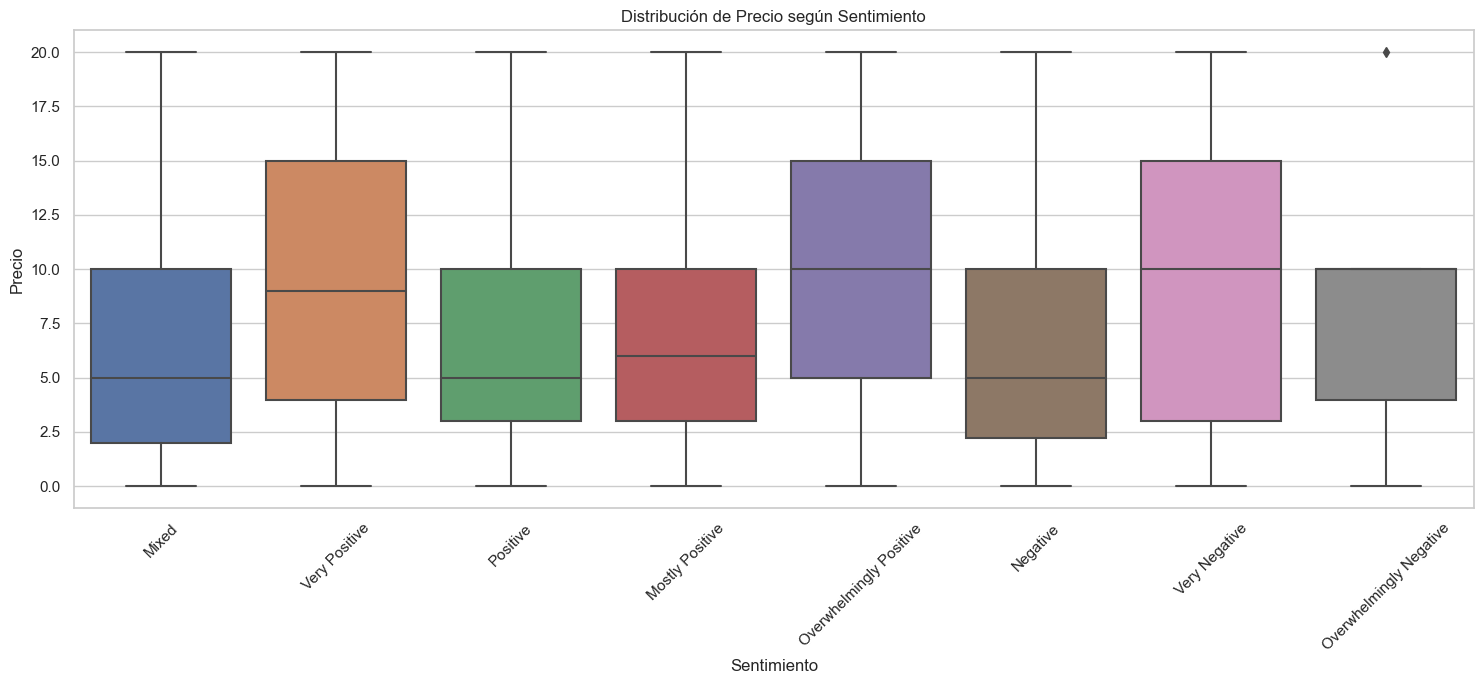

In [129]:

# Definir los sentimientos de interés

sentiments_of_interest = ["Mixed", "Very Positive", "Positive", "Mostly Positive", "Overwhelmingly Positive", 
                          "Negative", "Very Negative", "Overwhelmingly Negative"]

# Filtrar el dataframe para incluir solo esos sentimientos
filtered_data = data[data['sentiment'].isin(sentiments_of_interest)]

plt.figure(figsize=(15, 7))
sns.boxplot(data=filtered_data, x='sentiment', y='price', order=sentiments_of_interest)
plt.title('Distribución de Precio según Sentimiento')
plt.ylabel('Precio')
plt.xlabel('Sentimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SENTIMIENTOS Y PRECIO